Neural Nets and Deep Learning Assignment 1

1 Feedforward: Building a ReLU 2 Layer neural network

In [478]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd

In [621]:
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# ReLU function
def relu(x):
    result = np.maximum(0, x)
    return result

def softmax1(x):
    y = np.exp(x)
    total = np.sum(y, axis=1)
    result = y / total
    return result

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

In [622]:
def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    a_1 = np.dot(x, w_1) + b_1
    h_1 = relu(a_1)
    a_2 = np.dot(h_1, w_2) + b_2
    h_2 = relu(a_2)
    y = softmax(np.dot(h_2, v) + c)
    return np.array(y)

In [623]:
w_1 = np.array([[1., 0], [-1., 0], [0, 0.5]]).T
w_2 = np.array([[1., 0, 0], [-1., -1., 0]]).T
v = np.array([[1., 1.], [0, 0], [-1., -1.]]).T
b_1 = np.array([0, 0, 1.])
b_2 = np.array([1., -1.])
c = np.array([1., 0, 0])
x = np.array([[1., 0, 0], [-1., -1., 1.]]).T

ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

2 Gradient Descent

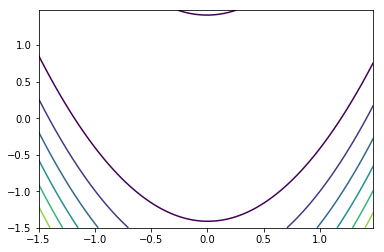

In [487]:
# 2 contours
delta = 0.025
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100 * ((Y-(X**2))**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

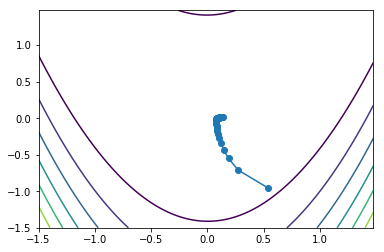

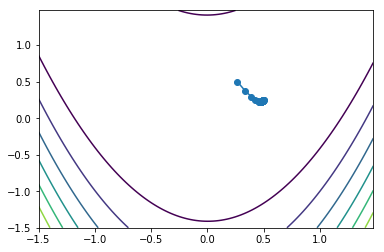

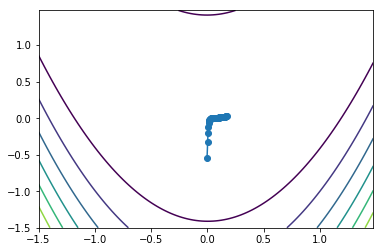

In [606]:
# Gradient Descent

def grad_f(vector):
    x, y = vector
    df_dx = 400 * x**3 - 400 * x * y + 2 * x - 2
    df_dy = 200 * (y - x*x)
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

rate_vec = [0.001, 0.0015, 0.002]

np.random.seed(10)

for i in range(len(rate_vec)):
    traj = grad_descent(iterations=50, learning_rate=rate_vec[i])
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x = traj[:,0]
    y = traj[:,1]
    plt.plot(x, y, '-o')

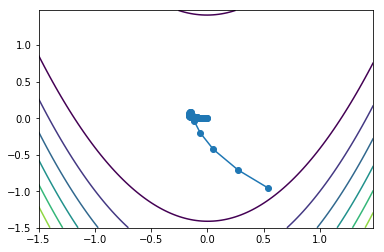

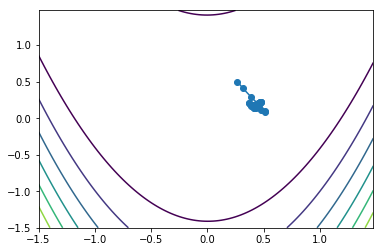

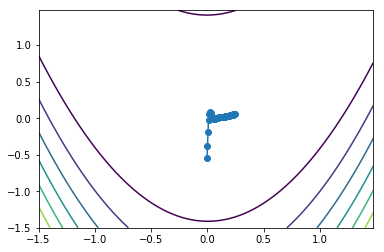

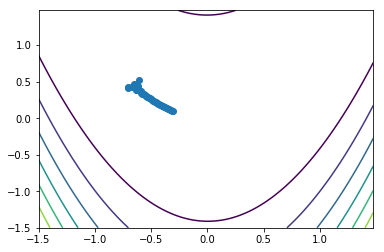

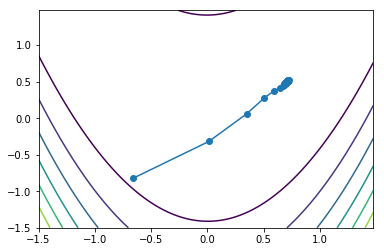

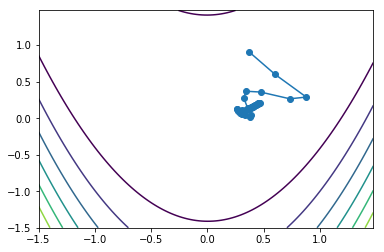

In [607]:
# 4 Gradient Descent with Momentum
def grad_descent_with_momentum(starting_point=None, iterations=10, epsilon=10, alpha=.9):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

epsilon_vec = [0.001, 0.0015, 0.002]
alpha_vec = [0.5, 0.7]

np.random.seed(10)
for i in range(len(epsilon_vec)):
    for j in range(len(alpha_vec)):
        traj = grad_descent_with_momentum(iterations=50, epsilon=epsilon_vec[i], alpha=alpha_vec[j])
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z)
        x = traj[:,0]
        y = traj[:,1]
        plt.plot(x, y, '-o')



3 Backprop

In [608]:
def pack_params(param_vec):
    w_111, w_112, w_113, w_121, w_122, w_123, b_11, b_12, b_13, w_211, w_212, w_221, w_222, w_231, w_232, b_21, b_22, v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3 = param_vec
    W1 = np.array([[w_111, w_112, w_113], [w_121, w_122, w_123]])
    b1 = np.array([b_11, b_12, b_13])
    W2 = np.array([[w_211, w_212], [w_221, w_222], [w_231, w_232]])
    b2 = np.array([b_21, b_22])
    v = np.array([[v_11, v_12, v_13],[v_21, v_22, v_23]])
    c = np.array([c_1, c_2, c_3])
    return((W1, b1, W2, b2, v, c))
    
def unpack_params(W1, b1, W2, b2, v, c):
    w_111, w_112, w_113, w_121, w_122, w_123 = W1[0,0], W1[0,1], W1[0,2], W1[1,0], W1[1,1], W1[1,2]
    b_11, b_12, b_13 = b1[0], b1[1], b1[2]
    w_211, w_212, w_221, w_222, w_231, w_232 = W2[0,0], W2[0,1], W2[1,0], W2[1,1], W2[2,0], W2[2,1]
    b_21, b_22 = b2[0], b2[1]
    v_11, v_12, v_13, v_21, v_22, v_23 = v[0,0], v[0,1], v[0,2], v[1,0], v[1,1], v[1,2]
    c_1, c_2, c_3 = c[0], c[1], c[2]
    return np.array([w_111, w_112, w_113, w_121, w_122, w_123, b_11, b_12, b_13, w_211, w_212, w_221, w_222, w_231, w_232, b_21, b_22, v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3])

In [609]:

def grad_f(param_vec, x, y):
    
    W1, b1, W2, b2, v, c = pack_params(param_vec)
    
    a1 = x.dot(W1) + b1
    h1 = relu(a1)
    a2 = h1.dot(W2) + b2
    h2 = relu(a2)
    a3 = h2.dot(v) + c
    y_hat = softmax(a3)
    
    d_v = h2.T.dot((y_hat - y))
    d_c = (y_hat - y).sum(axis=0)
    d_W2 = h1.T.dot((y_hat - y).dot(v.T) * (h2 > 0))
    d_b2 = ((y_hat - y).dot(v.T) * (h2 > 0)).sum(axis=0)
    d_W1 = x.T.dot(((y_hat - y).dot(v.T) * (h2 > 0)).dot(W2.T) * (h1>0))
    d_b1 = (((y_hat - y).dot(v.T) * (h2 > 0)).dot(W2.T) * (h1>0)).sum(axis=0)
    
    param_vec = unpack_params(d_W1, d_b1, d_W2, d_b2, d_v, d_c)
    return np.array(param_vec)

In [610]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [611]:
x,y,cl = gen_gmm_data(500)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


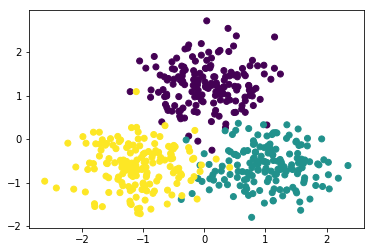

In [612]:
plt.scatter(x[:,0], x[:,1], c=cl[0])

In [613]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def yhat(x, y, para):
    w_1 = para[0:6].reshape(2,3)
    b_1 = para[6:9].reshape(1,3)
    w_2 = para[9:15].reshape(3,2)
    b_2 = para[15:17].reshape(1,2)
    v = para[17:23].reshape(2,3)
    c = para[23:26].reshape(1,3)
    
    h_1 = relu(np.dot(x, w_1) + b_1)
    h_2 = relu(np.dot(h_1, w_2) + b_2)
    y = softmax(np.dot(h_2, v) + c)

    return y

In [614]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1, .1, size=26).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, y, point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, y, point)))
    return (np.array(trajectory), losses)

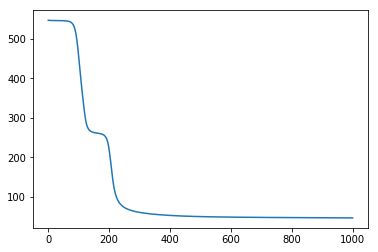

In [615]:
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=1e-3)
plt.plot(losses)

In [616]:
# 5 Fit Momentum
def grad_descent_with_momentum(x, y,  iterations=10, epsilon = 1e-3, alpha =0.5):
    parameters = np.random.uniform(-1, 1, size=26).astype("float128")
    trajectory = [parameters]
    losses = [loss(y, yhat(x, y, parameters))]
    vector = np.zeros(parameters.size)
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        vector = alpha * vector + epsilon * grad
        parameters = parameters - vector
        trajectory.append(parameters)
        losses.append(loss(y, yhat(x, y, parameters)))
        
    return (np.array(trajectory), losses)

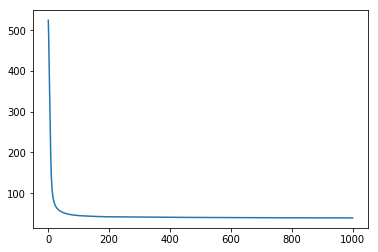

In [617]:
traj, losses = grad_descent_with_momentum(x, y, iterations=1000, epsilon = 1e-3, alpha = 0.5)
plt.plot(losses)

When we use gradient descent with momentum, the loss function decreases faster than without using momentum. Thus, the algorithm with momentum is more efficient than the one without it.